# Assignment: Linear Models

## Question 0 

1. What makes a model "linear"? "Linear" in what?

A model is linear if it is able to study the relationship between two variables, such x and y. This is typically by means of regression where we try to find a linear equation that best predicts y with input x. In doing so, we find the correlation and also the strength of the linear relationship. 

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.

One-hot encoding changes all categorical variables into binary dummy variables. The coefficient of a dummy variable is the average change in y for categorical variables present. The change is calculated between the dependent variable and the reference baseline category that is ket constant. The intercept of the model is the expected value of the dependent variable where all the independent variables are zero.

3. Can linear regression be used for classification? Explain why, or why not.

No, linear regression uses quantitative variables instead of categorical variables as it measures a relationship that spans a range of values. 

4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.

The higher accuracy on training and low on testing means that there is over-fitting for the training model. This meant the regression analysis that was calculated for a certain dataset fit the training dataset too well that it deviated from generalizing the overall dataset, causing it to neglect the testing dataset. In this case, using a nonlinear model may benefit instead of linear where the model can get affected by the bottom average of the data. 

5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables 
$x$?

One way is to engineer a more diverse and detailed set of features by including professional knowledge that can be used by a linear model. Another way is to use kernels that have locally-based function instead of global linear decision function. 

6.  What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept, Beta 0, is expected value of the dependent variable where all independent variable are 0. The slope coefficient, Beta 1, is the change in dependent variable over the independent variable that supports the linear regression. The coefficient for dummy variable is the average difference between the dependent variable from the reference category. 

## Question 1

Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


#### 1) Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

Average price and score

In [3]:
df.groupby('Neighbourhood ')['Price'].mean()

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

In [4]:
df.groupby('Neighbourhood ')['Review Scores Rating'].mean()

Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64

Kernel Density Plot for price and log price

Text(0.5, 1.0, 'Kernel Density Plot of Price by Neighbourhood ')

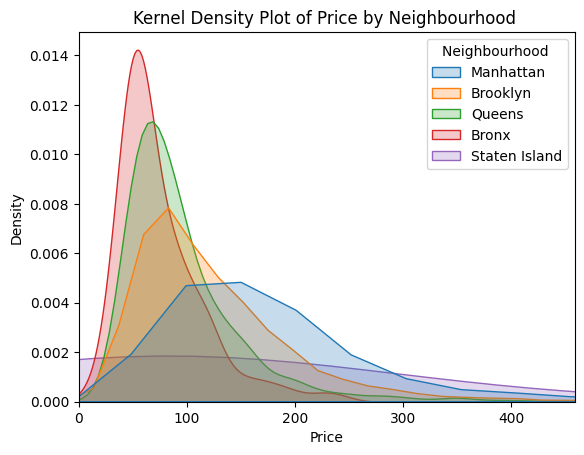

In [15]:
sns.kdeplot(df, x="Price", hue="Neighbourhood ", fill=True, common_norm=False)
plt.xlim(0, np.percentile(df['Price'], 98))
plt.title("Kernel Density Plot of Price by Neighbourhood ")

Text(0.5, 1.0, 'Kernel Density Plot of Log(Price) by Neighbourhood ')

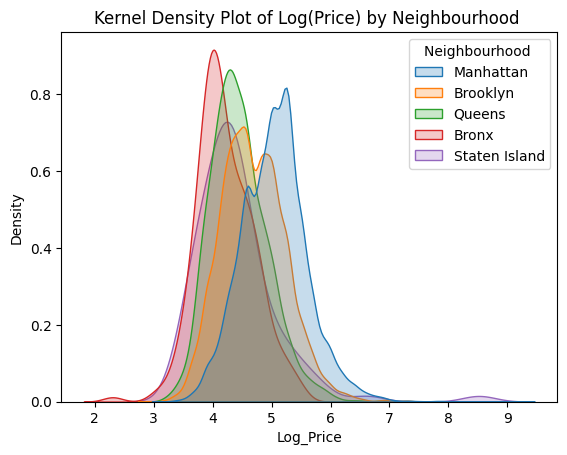

In [16]:
df['Log_Price'] = np.log(df['Price'])
sns.kdeplot(data=df, x="Log_Price", hue="Neighbourhood ", fill=True, common_norm=False)
plt.title("Kernel Density Plot of Log(Price) by Neighbourhood ")

#### 2) Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [17]:
from sklearn.linear_model import LinearRegression

X = pd.get_dummies(df["Neighbourhood "], drop_first = False)
y = df['Price']

model = LinearRegression(fit_intercept = False)
model.fit(X,y)

coef = model.coef_
print(coef)

[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


From observing the pattern, the coefficients that are displayed are the direct mean of the pice of neighborhood. For a regression without intercept, this means that a categorical variables with n categories yield the group means of the dependent variable. 

#### 3) Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [18]:
X = pd.get_dummies(df['Neighbourhood '], drop_first = True)
y = df['Price']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

intercept = model.intercept_
coef = model.coef_

print(intercept)
print(coef)

75.27649769585331
[ 52.47088065 108.38778863  21.58073501  70.89016897]


The intercept, 75.27, is the mean of the drop_first neighborhood, which is Bronx. This means the coefficients are yielded represents the difference between that drop_first mean and the rest of the neighorhood's mean because the dummy variable allows it to move the value by the exact difference to get to the mean. 

#### 4) Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pandas import read_csv, Series, DataFrame

X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)


R^2: 0.072
RMSE: 121.49
Review Scores Rating              1.007598
Neighbourhood _Brooklyn          57.246732
Neighbourhood _Manhattan        113.129859
Neighbourhood _Queens            26.283642
Neighbourhood _Staten Island     82.074131
dtype: float64


The R^2 is 0.072. The RMSE is 121.49. The coefficient for Review Scores Rating is 1.0075. Based on the coefficients for Neighbourhood, Manhattan is the most expensive place to rent. 

#### 5) Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [27]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)

R^2: 0.086
RMSE: 120.568
Review Scores Rating             1.006896e+00
Neighbourhood _Brooklyn          6.461103e+01
Neighbourhood _Manhattan         1.255588e+02
Neighbourhood _Queens            3.166652e+01
Neighbourhood _Staten Island     7.462722e+01
Property Type_Bed & Breakfast   -3.274745e+01
Property Type_Boat               6.195455e+01
Property Type_Bungalow           5.628966e+01
Property Type_Cabin             -2.664535e-14
Property Type_Camper/RV         -2.254063e+01
Property Type_Castle            -4.018187e+01
Property Type_Chalet            -2.922726e+01
Property Type_Condominium        9.128475e+01
Property Type_Dorm              -4.821102e+01
Property Type_House              3.541865e+01
Property Type_Hut               -1.341405e+02
Property Type_Lighthouse        -9.023415e+01
Property Type_Loft               5.993960e+01
Property Type_Other              4.872083e+01
Property Type_Townhouse          3.856048e+01
Property Type_Treehouse         -7.609568e+01
Property 

The R^2 is 0.086. The RMSE is 120.568. The coefficient for Review Scores Rating is 1.0069. Based on the coefficients for property type, Condominium is the most expensive type of place to rent. 

#### 6) What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

The coefficient on Review Scores Rating decreased a little from part 4 to 5. The idea of multiple linear regression is that it adds more complexity to the model, which makes it better at predicting the dependent variables. With the addition of property type, it provides a more nuance analysis that accounts for more variation in price that makes it better to predict. 